## Trabajo Grupal 6

### Grupo 1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
import datetime as dt
import numpy as np

In [116]:
pesos = pd.read_stata(r"../../data/Pesos/peso.dta")
pesos

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109.0,12.0,12.0,1.0,1.0,1.0,0.0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133.0,6.0,12.0,2.0,1.0,0.0,0.0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129.0,NaN,12.0,2.0,0.0,0.0,0.0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126.0,12.0,12.0,2.0,1.0,0.0,0.0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134.0,14.0,12.0,2.0,1.0,1.0,0.0,4.897840,8.3750,0.0,3.314186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,27.5,30.0,138.300003,110.0,12.0,12.0,4.0,1.0,1.0,0.0,4.700480,6.8750,0.0,3.314186
1384,5.5,30.0,138.300003,146.0,NaN,16.0,2.0,1.0,1.0,0.0,4.983607,9.1250,0.0,1.704748
1385,65.0,8.0,118.599998,135.0,18.0,16.0,2.0,0.0,1.0,0.0,4.905275,8.4375,0.0,4.174387
1386,27.5,8.0,118.599998,118.0,NaN,14.0,2.0,0.0,1.0,0.0,4.770685,7.3750,0.0,3.314186


In [118]:
pesos["sit_mom"] = (pesos["cigs"] > 0)            # create a new variable with situation of mom that smoke 
pesos["sit_mom"] = pesos["sit_mom"].astype(int)   # get the entire number of cigs to verify if are smokers

In [119]:
pesos.groupby('sit_mom').size()

sit_mom
0    1176
1     212
dtype: int64

In [120]:
pesos["sit_mom"] = pesos["sit_mom"].replace([0],"Madre no Fumadora")  # replace the data in cigs to know if they are smokers
pesos["sit_mom"] = pesos["sit_mom"].replace([1],"Madre Fumadora")

In [121]:
pesos

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc,sit_mom
0,13.5,16.5,122.300003,109.0,12.0,12.0,1.0,1.0,1.0,0.0,4.691348,6.8125,0.0,2.602690,Madre no Fumadora
1,7.5,16.5,122.300003,133.0,6.0,12.0,2.0,1.0,0.0,0.0,4.890349,8.3125,0.0,2.014903,Madre no Fumadora
2,0.5,16.5,122.300003,129.0,NaN,12.0,2.0,0.0,0.0,0.0,4.859812,8.0625,0.0,-0.693147,Madre no Fumadora
3,15.5,16.5,122.300003,126.0,12.0,12.0,2.0,1.0,0.0,0.0,4.836282,7.8750,0.0,2.740840,Madre no Fumadora
4,27.5,16.5,122.300003,134.0,14.0,12.0,2.0,1.0,1.0,0.0,4.897840,8.3750,0.0,3.314186,Madre no Fumadora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,27.5,30.0,138.300003,110.0,12.0,12.0,4.0,1.0,1.0,0.0,4.700480,6.8750,0.0,3.314186,Madre no Fumadora
1384,5.5,30.0,138.300003,146.0,NaN,16.0,2.0,1.0,1.0,0.0,4.983607,9.1250,0.0,1.704748,Madre no Fumadora
1385,65.0,8.0,118.599998,135.0,18.0,16.0,2.0,0.0,1.0,0.0,4.905275,8.4375,0.0,4.174387,Madre no Fumadora
1386,27.5,8.0,118.599998,118.0,NaN,14.0,2.0,0.0,1.0,0.0,4.770685,7.3750,0.0,3.314186,Madre no Fumadora


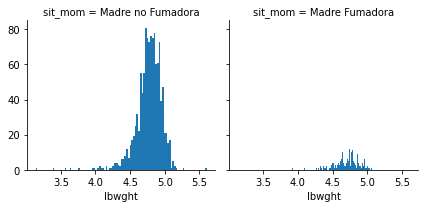

In [122]:
figure1 = sns.FacetGrid(pesos, col="sit_mom", margin_titles=True)
figure1.map(plt.hist, 'lbwght', bins=100)     # to show the hsitogram of moms with the weight of baby

C:\Users\PERSONAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '')

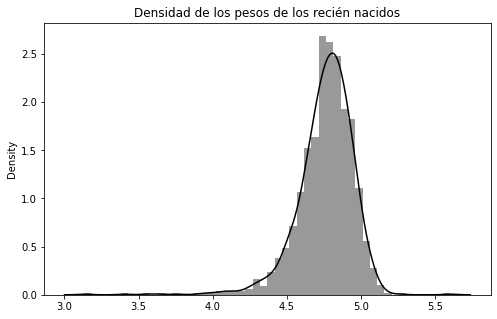

In [110]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.distplot(pesos['lbwght'], label = "Densidad", color = 'black')
plt.title('Densidad de los pesos de los recién nacidos')
plt.xlabel('')

Text(0.5, 0, '')

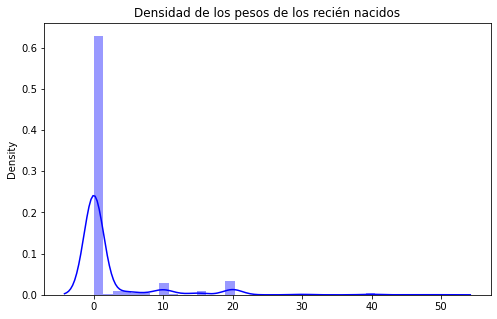

In [124]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.distplot(pesos['cigs'], label = "Densidad", color = 'blue')
plt.title('Densidad de los pesos de los recién nacidos')
plt.xlabel('')